In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/car data.csv')

In [ ]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
df['Seller_Type']=df['Seller_Type'].map({'Dealer':0,'Individual':1})
df['Transmission']=df['Transmission'].map({'Manual':0,'Automatic':1})#ده علشان هم اسماء فانا هحولهم الي الراقام

In [ ]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [ ]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

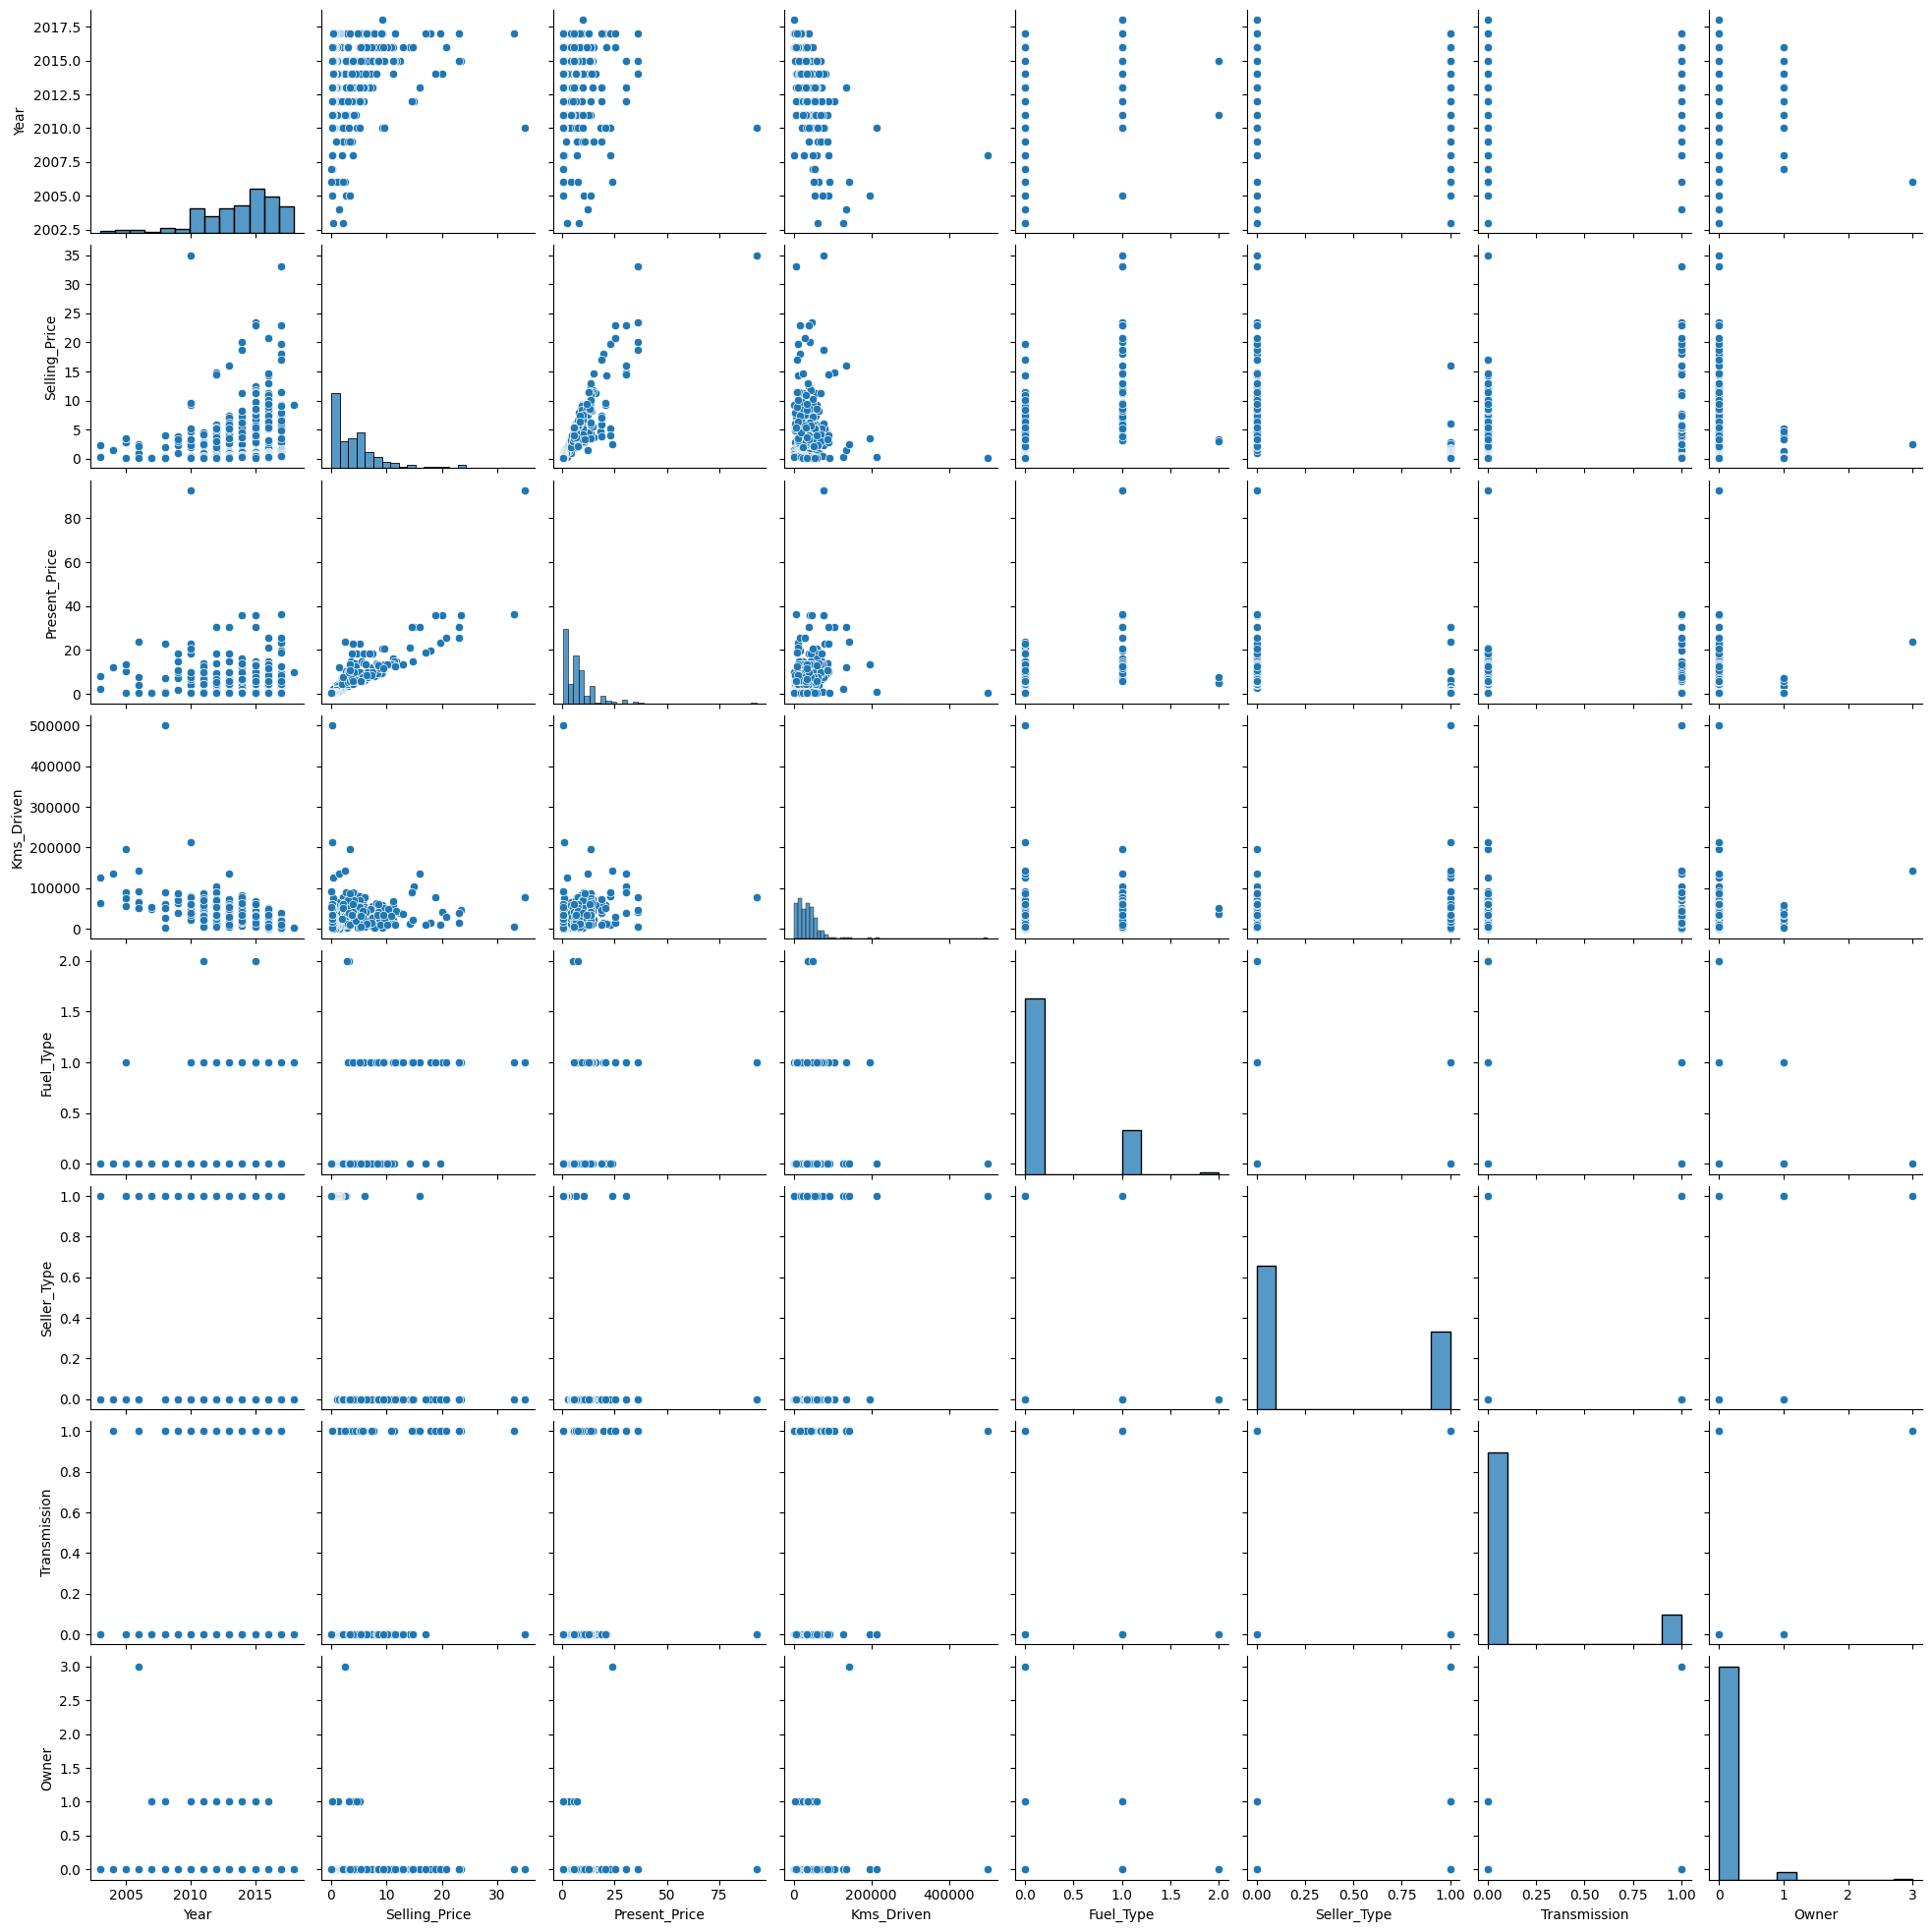

In [ ]:
sns.pairplot(df)
#

<Axes: ylabel='Selling_Price'>

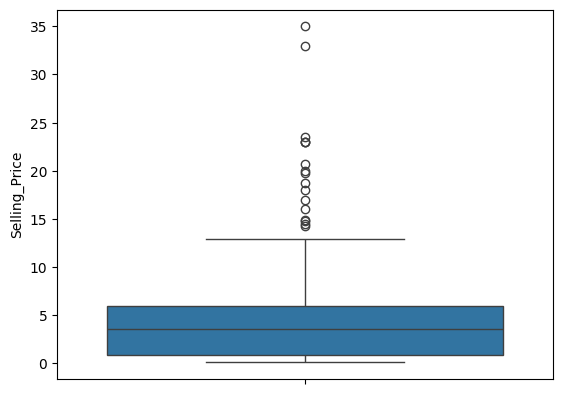

In [ ]:
sns.boxplot(df['Selling_Price'])

<Axes: ylabel='Present_Price'>

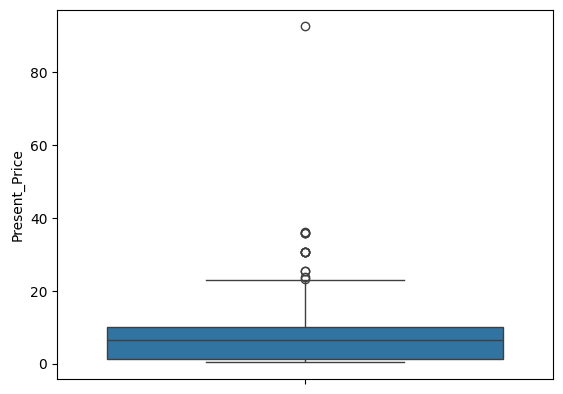

In [ ]:
sns.boxplot(df['Present_Price'])

<Axes: xlabel='Selling_Price', ylabel='Count'>

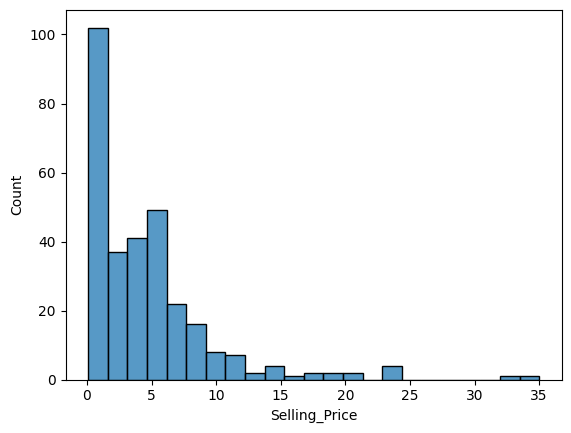

In [ ]:
sns.histplot(df['Selling_Price'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(x_train)
    ytest_predict = model.predict(x_test)

    train_error = np.sqrt(mean_squared_error(y_train, ytrain_predict))
    test_error = np.sqrt(mean_squared_error(y_test, ytest_predict))

    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)

    # Scatter plot for training and testing predictions
    plt.scatter(y_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(y_test, ytest_predict, marker='^', label='Test Predictions')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")
    print(coefs)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Training error (rmse): 1.791870443785453
Testing error (rmse): 1.5871125695254915


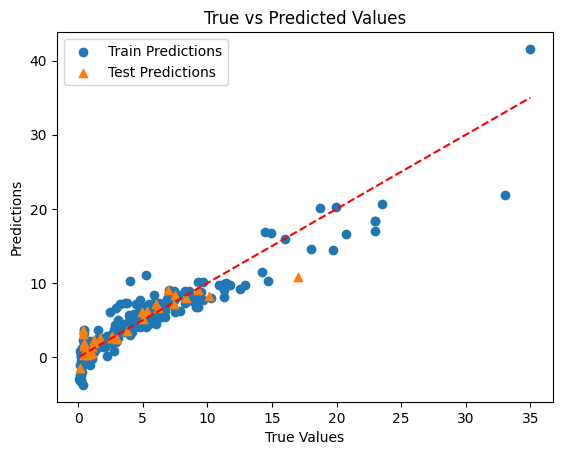

Coefficients:
[-812.8236978602093, 0.40436297231404794, 0.43752974079259044, -6.386702569471936e-06, 1.6071794129498607, -1.0284018386276457, 1.6803828848060385, -0.8037199791269934]


In [ ]:
display_results(lin_reg_model)

In [ ]:
from sklearn.linear_model import Lasso
lass_reg_model=Lasso()
lass_reg_model.fit(x_train,y_train)

Lasso()

Training error (rmse): 2.0503504697663506
Testing error (rmse): 1.5484932445075412


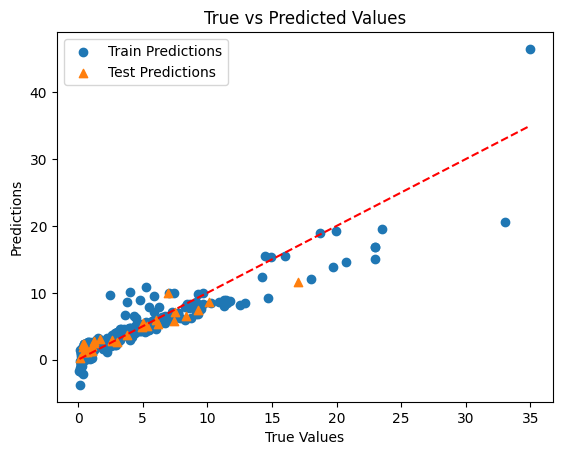

Coefficients:
[-671.1815606257097, 0.3338327254830167, 0.5091390737306508, -6.389208031128585e-06, 0.0, -0.0, 0.0, -0.0]


In [ ]:
display_results(lass_reg_model)

In [ ]:
lin_reg_model.score(x_test,y_test)

0.8311069476244144

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg_model=Ridge()
ridge_reg_model.fit(x_train,y_train)

Ridge()

Training error (rmse): 1.792107492358517
Testing error (rmse): 1.5740341832799647


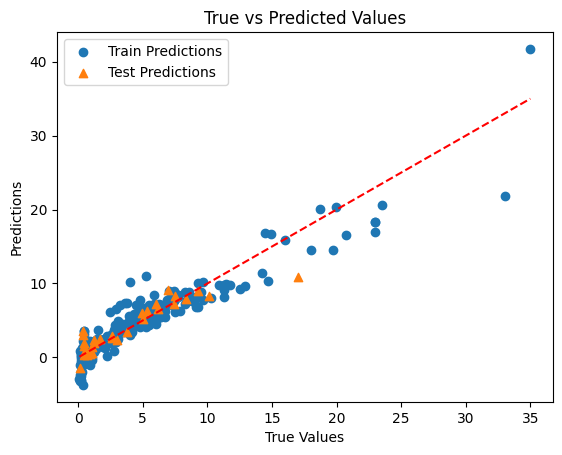

Coefficients:
[-817.6981146541543, 0.4067764583413967, 0.4398306335011833, -6.220263308227581e-06, 1.564952202931676, -1.0078774289565755, 1.610465508371943, -0.7616948483111997]


In [ ]:
display_results(ridge_reg_model)